# Statistisc, lab 1

In [1]:
import numpy as np
import seaborn as sns
import scipy as sp
from  matplotlib import pyplot as plt
from math import sqrt, gamma
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
dists = {'Normal': {
            'gen_data': np.random.standard_normal, 
            'cdf': sp.stats.norm.cdf, 
            'pdf': sp.stats.norm.pdf
        },
         'Cauchy': {
             'gen_data': np.random.standard_cauchy, 
             'cdf': sp.stats.cauchy.cdf, 
             'pdf':sp.stats.cauchy.pdf
         },
         'Laplace': {
             'gen_data': lambda n: np.random.laplace(0, 1 / sqrt(2), n),
             'cdf': lambda x: sp.stats.laplace.cdf(x, 0, 1 / sqrt(2)),
             'pdf': lambda x: sp.stats.laplace.pdf(x, 0, 1 / sqrt(2))
         },
         'Poisson': {
             'gen_data': lambda n: np.random.poisson(10, n), 
             'cdf': lambda x: sp.stats.poisson.cdf(x, 10), 
             'pdf': lambda x: 10 ** x * np.exp(-10) / gamma(x + 1)
         },
         'Uniform': {
             'gen_data': lambda n: np.random.uniform(-sqrt(3), sqrt(3), n), 
             'cdf': lambda x: sp.stats.uniform.cdf(x, -sqrt(3), 2 * sqrt(3)), 
             'pdf': lambda x: sp.stats.uniform.pdf(x, -sqrt(3), 2 * sqrt(3))
        }}

## Task 1

### Histograms

In [3]:
def build_hist(datasets, pdf, name):
    fig, axes = plt.subplots(1, len(datasets), figsize=(20, 6))
    fig.suptitle(name)
    for i, data in enumerate(datasets):
        sns.histplot(data, kde=False, stat='density', label='samples', ax=axes[i])
        x0, x1 = axes[i].get_xlim()
        x_pdf = np.linspace(x0, x1, 100)
        y_pdf = [pdf(x) for x in x_pdf]

        axes[i].plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
        axes[i].legend()
        axes[i].set_title(f'n = {len(data)}')

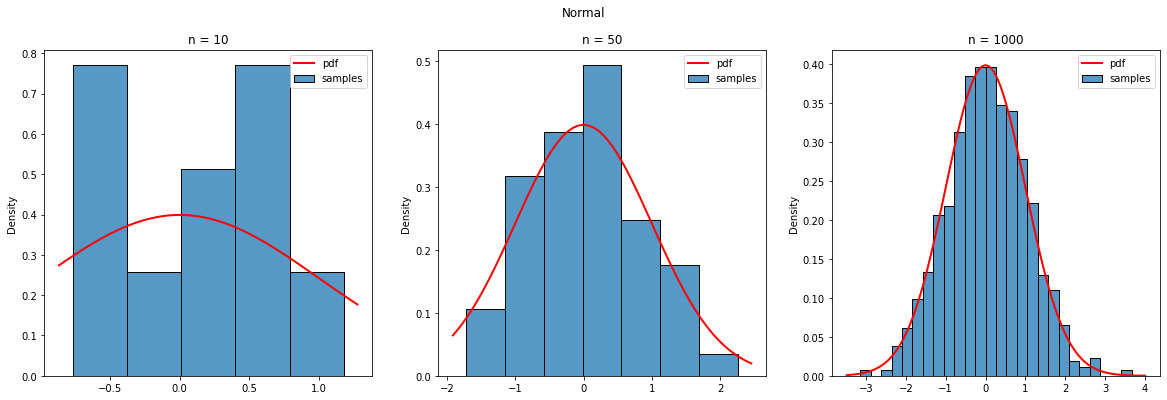

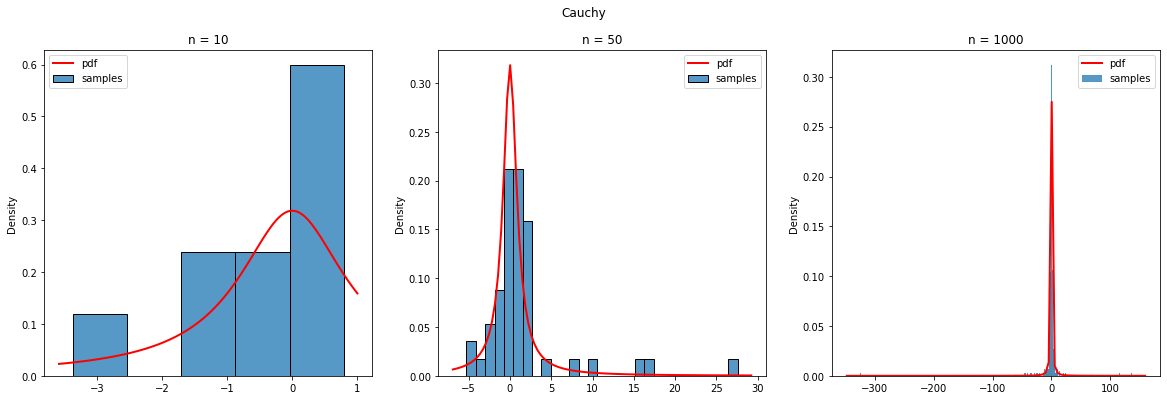

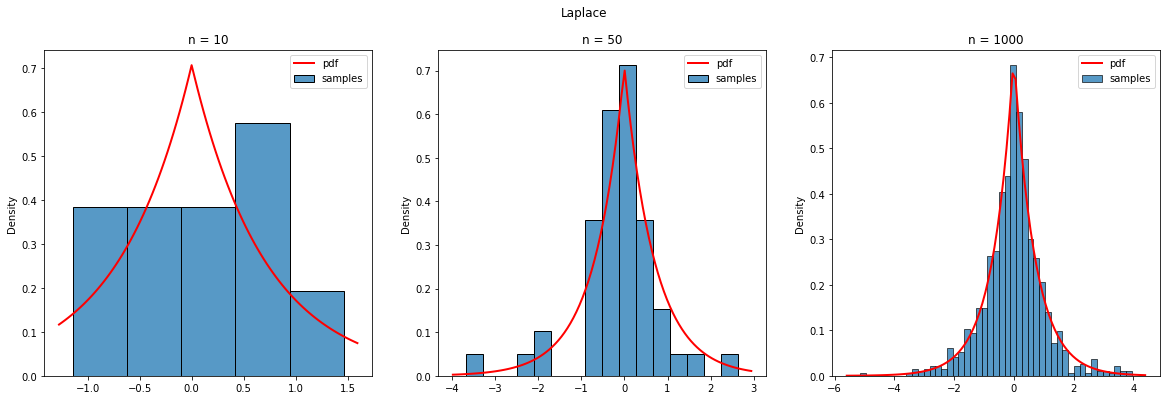

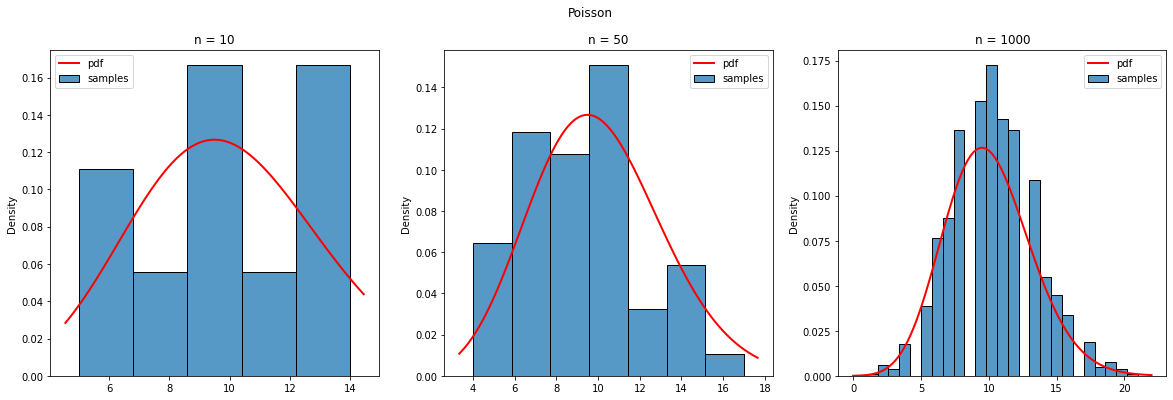

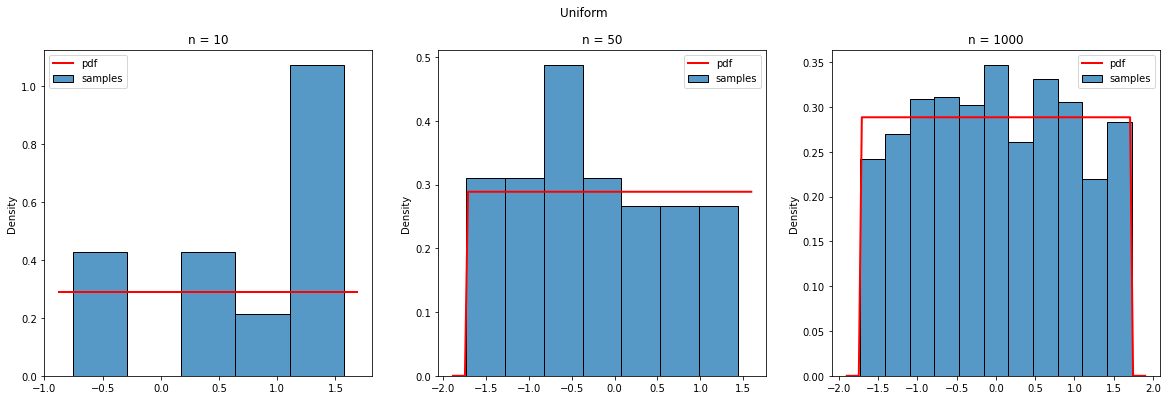

In [4]:
for name, dist in dists.items():
    build_hist([dist['gen_data'](n) for n in [10, 50, 1000]], dist['pdf'], name)

## Task 2

### Position and dispersion characteristics

In [28]:
def calc_chars(data_generator, n):
    iters = 1000
    mean = 0
    med = 0
    z_r = 0
    z_q = 0
    z_tr = 0
    mean_2 = 0
    med_2 = 0
    z_r_2 = 0
    z_q_2 = 0
    z_tr_2 = 0
    for i in range(iters):
        data = data_generator(n)
        data.sort()
        
        tmp = data.mean()
        mean += tmp
        mean_2 += tmp ** 2
        
        tmp = np.median(data)
        med += tmp
        med_2 += tmp ** 2 
        
        tmp = (data[0] + data[-1]) / 2
        z_r += tmp
        z_r_2 += tmp ** 2
        
        tmp = (np.quantile(data, 0.25) + np.quantile(data, 0.75)) / 2
        z_q += tmp
        z_q_2 += tmp ** 2
        
        r = n // 4
        tmp = sum(data[r:-r]) / (n - 2 * r)
        z_tr += tmp
        z_tr_2 += tmp ** 2
    
    mean /= iters
    med /= iters
    z_r /= iters
    z_q /= iters
    z_tr /= iters
    mean_2 /= iters
    med_2 /= iters
    z_r_2 /= iters
    z_q_2 /= iters
    z_tr_2 /= iters
    
    d_mean = mean_2 - mean ** 2
    d_med = med_2 - med ** 2
    d_z_r = z_r_2 - z_r ** 2
    d_z_q = z_q_2 - z_q ** 2
    d_z_tr = z_tr_2 - z_tr ** 2
    
    return tuple(map(lambda x: round(x, 4) ,(mean, med, z_r, z_q, z_tr,\
           d_mean, d_med, d_z_r, d_z_q, d_z_tr,\
           mean - sqrt(d_mean),\
           med - sqrt(d_med),\
           z_r - sqrt(d_z_r),\
           z_q - sqrt(d_z_q),\
           z_tr - sqrt(d_z_tr),\
           mean + sqrt(d_mean),\
           med + sqrt(d_med),\
           z_r + sqrt(d_z_r),\
           z_q + sqrt(d_z_q),\
           z_tr + sqrt(d_z_tr))))
    

In [29]:
for name, dist in dists.items():
    for n in [10, 100, 1000]:
        print(f'{name}, n = {n}:', ' & '.join(map(str, calc_chars(dist['gen_data'], n))))
    print()

Normal, n = 10: 0.0064 & 0.0145 & -0.006 & 0.0096 & 0.011 & 0.1086 & 0.1478 & 0.1808 & 0.1228 & 0.1228 & -0.3232 & -0.3699 & -0.4312 & -0.3409 & -0.3395 & 0.336 & 0.3989 & 0.4192 & 0.36 & 0.3614
Normal, n = 100: 0.003 & 0.0023 & -0.0084 & 0.0004 & 0.0021 & 0.0112 & 0.0166 & 0.0948 & 0.0126 & 0.0127 & -0.1031 & -0.1266 & -0.3163 & -0.1118 & -0.1104 & 0.109 & 0.1311 & 0.2994 & 0.1126 & 0.1146
Normal, n = 1000: 0.0 & 0.0015 & -0.0026 & -0.0001 & 0.0001 & 0.001 & 0.0016 & 0.0622 & 0.0012 & 0.0012 & -0.0315 & -0.0383 & -0.252 & -0.0351 & -0.0345 & 0.0316 & 0.0414 & 0.2469 & 0.0349 & 0.0347

Cauchy, n = 10: 0.027 & 0.0345 & 0.3185 & -0.0241 & 0.005 & 264.5433 & 0.3182 & 6380.7953 & 0.8875 & 0.4841 & -16.2378 & -0.5295 & -79.5614 & -0.9662 & -0.6907 & 16.2918 & 0.5986 & 80.1984 & 0.918 & 0.7008
Cauchy, n = 100: 0.566 & -0.0109 & 28.7123 & -0.0035 & -0.0073 & 253.2279 & 0.0255 & 605359.8489 & 0.0536 & 0.0275 & -15.3472 & -0.1707 & -749.3364 & -0.235 & -0.1731 & 16.4791 & 0.1488 & 806.7611 & 0.

## Task 3

### Boxplots

In [7]:
def build_boxplot(dataset, title):
    names=[str(len(data)) for data in dataset]
    fig, ax = plt.subplots(1, 1)
    sns.boxplot(data=dataset, orient='h', ax=ax)
    ax.set(xlabel='x', ylabel='n')
    ax.set(yticklabels=names)
    ax.set_title(title)

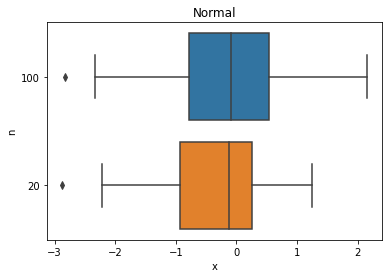

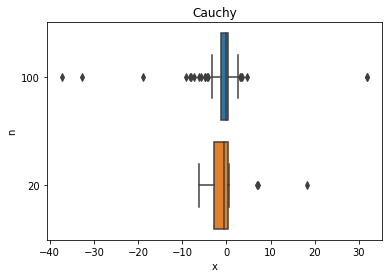

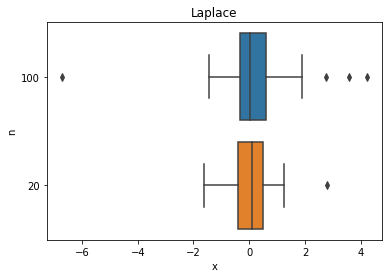

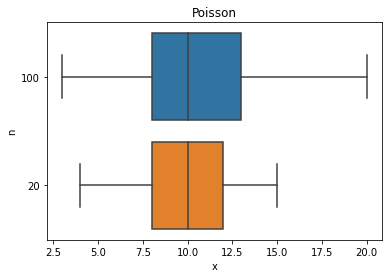

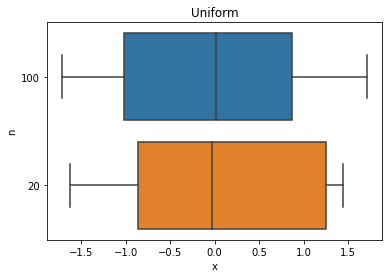

In [8]:
for name, dist in dists.items():
    build_boxplot([dist['gen_data'](100), dist['gen_data'](20)], name)

### Share of outliers

In [9]:
def calc_outlier(data_generator, n, iters=1000):
    num = 0
    for i in range(iters):
        data = data_generator(n)
        q1 = np.quantile(data, 0.25)
        q3 = np.quantile(data, 0.75)
        iqr = q3 - q1
        x1 = q1 - 1.5 * iqr
        x2 = q3 + 1.5 * iqr
        num += np.count_nonzero((data < x1) | (x2 < data)) / n
    return round(num / iters, 2)

In [10]:
for name, dist in dists.items():
    for n in [20, 100]:
        print(f'{name} {n}:', calc_outlier(dist['gen_data'], n))

Normal 20: 0.02
Normal 100: 0.01
Cauchy 20: 0.16
Cauchy 100: 0.16
Laplace 20: 0.08
Laplace 100: 0.07
Poisson 20: 0.02
Poisson 100: 0.01
Uniform 20: 0.0
Uniform 100: 0.0


## Task 4

### Empirical distribution function

In [11]:
def build_edf(name, datasets, cdf, x):
    fig, axes = plt.subplots(1, len(datasets), figsize=(12, 5))
    fig.suptitle(name)
    for i, data in enumerate(datasets):
        y1 = ECDF(data)(x)
        y2 = cdf(x)
        axes[i].plot(x, y1)
        axes[i].plot(x, y2)
        axes[i].set_title(f'n = {len(data)}')

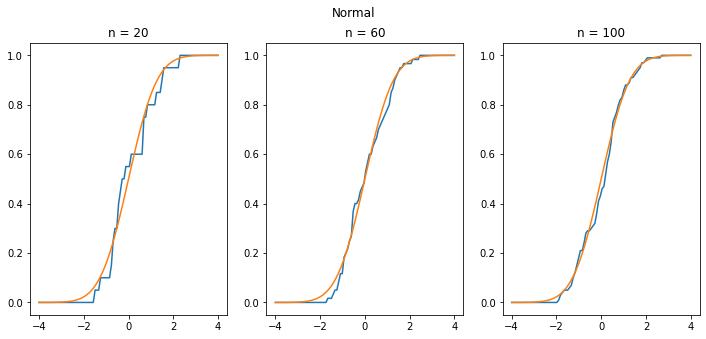

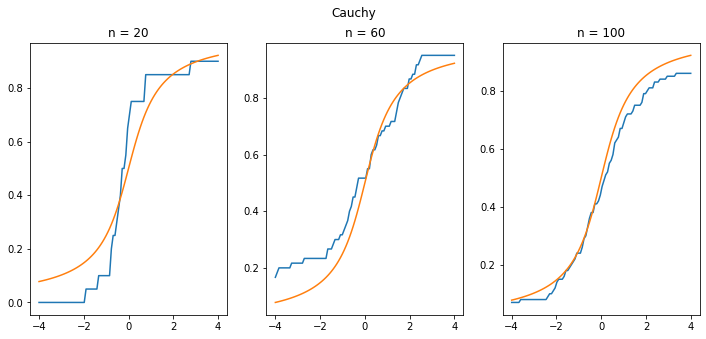

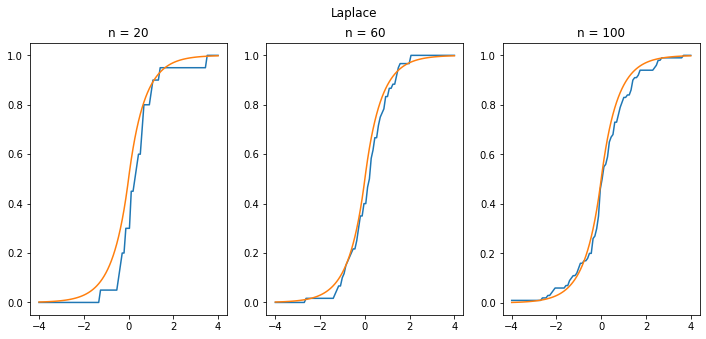

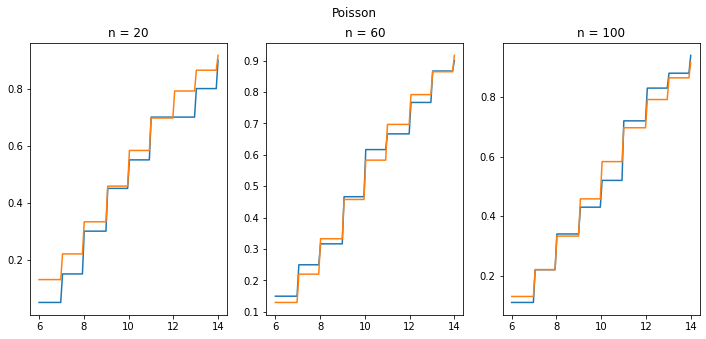

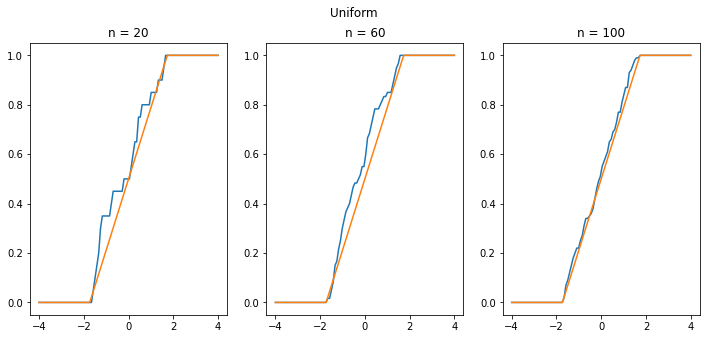

In [12]:
for name, dist in dists.items():
    if name != 'Poisson': 
        build_edf(name, [dist['gen_data'](n) for n in [20, 60, 100]], dist['cdf'], np.linspace(-4, 4, 100))
    else:
        build_edf(name, [dist['gen_data'](n) for n in [20, 60, 100]], dist['cdf'], np.linspace(6, 14, 100))

### KDE

In [13]:
def build_kde(name, data, pdf, x):
    scales = [0.5, 1.0, 2.0]
    fig, ax = plt.subplots(1, len(scales), figsize=(12, 4))
    fig.suptitle(f'{name}, n = {len(data)}')
    for i, scale in enumerate(scales):
        sns.kdeplot(data, ax=ax[i], bw_method='silverman', bw_adjust=scale, label='kde')
        ax[i].set_xlim([x[0], x[-1]])
        ax[i].set_ylim([0, 1])
        ax[i].plot(x, [pdf(xk) for xk in x], label='pdf')
        ax[i].legend()
        ax[i].set_title(f'h={str(scale)}*$h_n$')

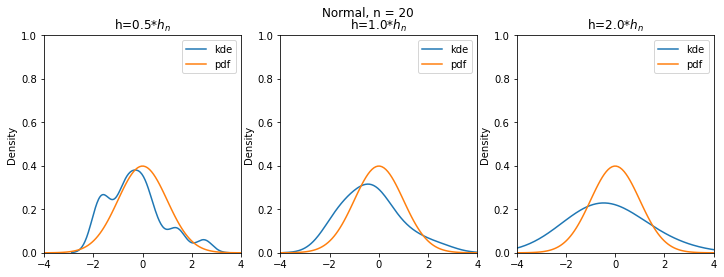

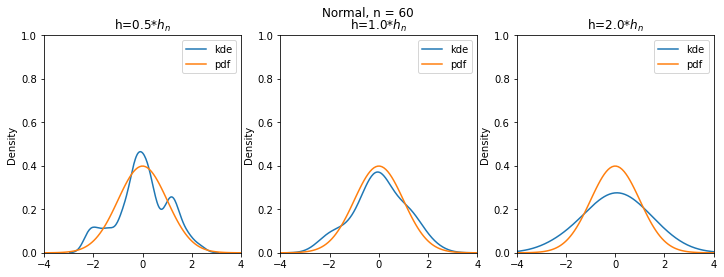

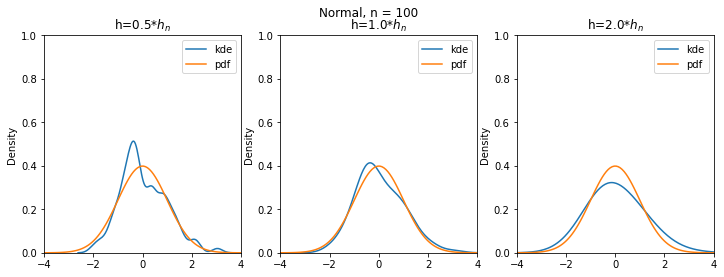

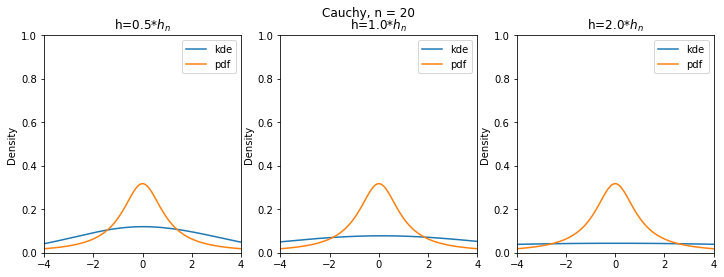

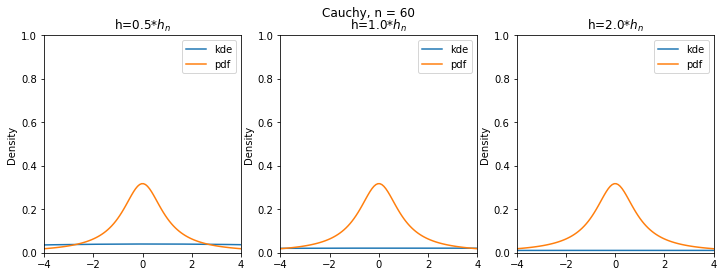

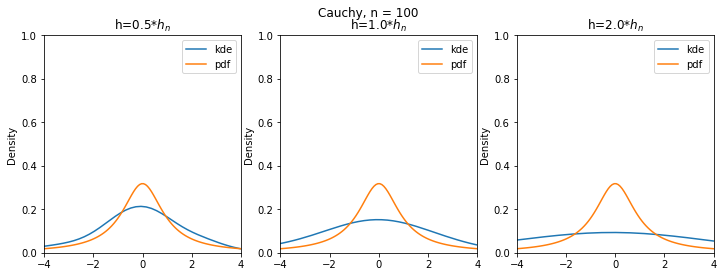

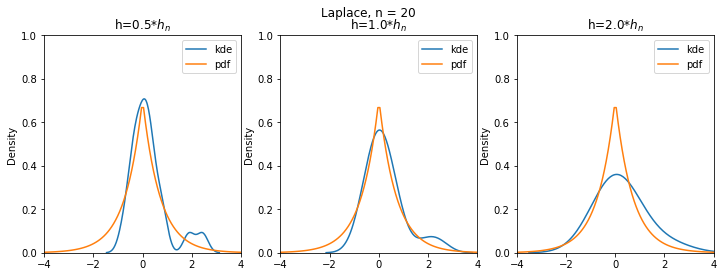

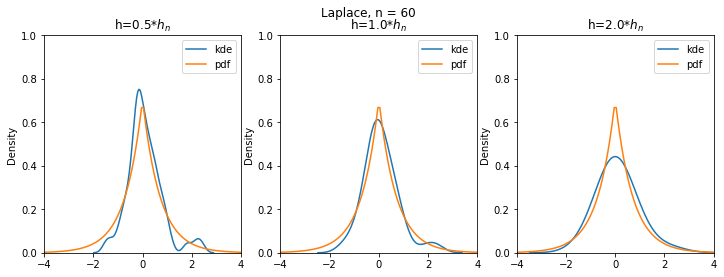

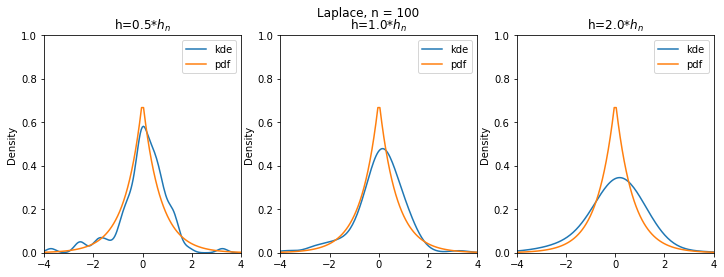

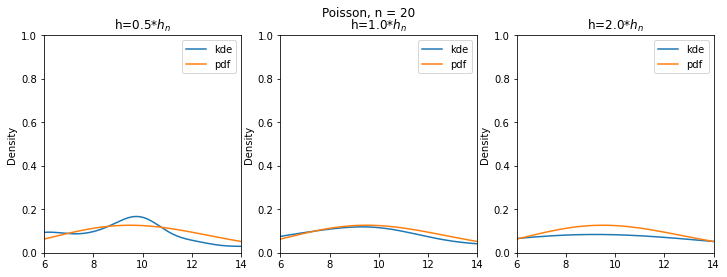

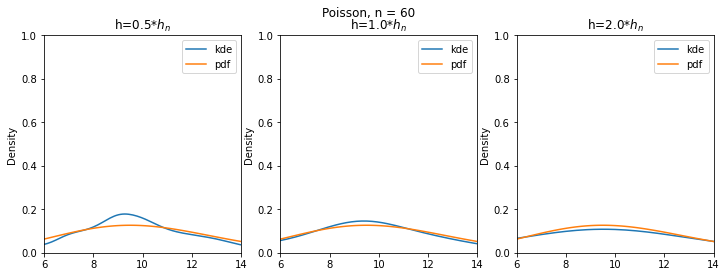

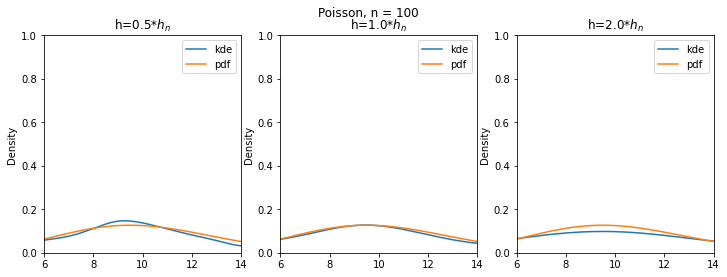

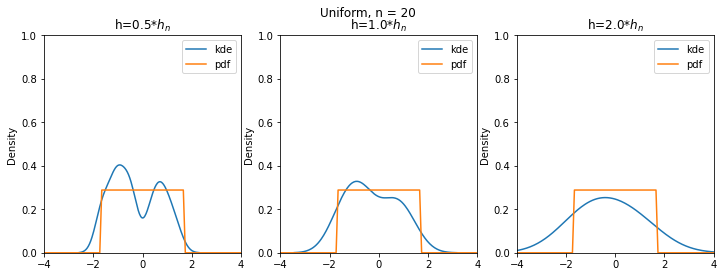

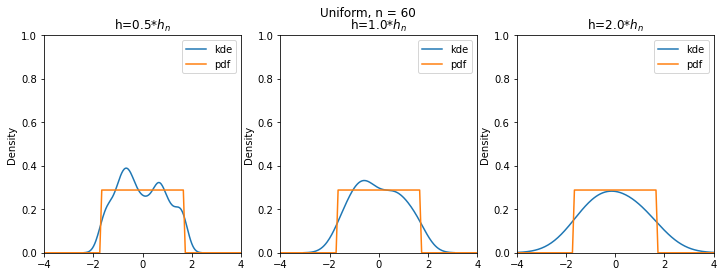

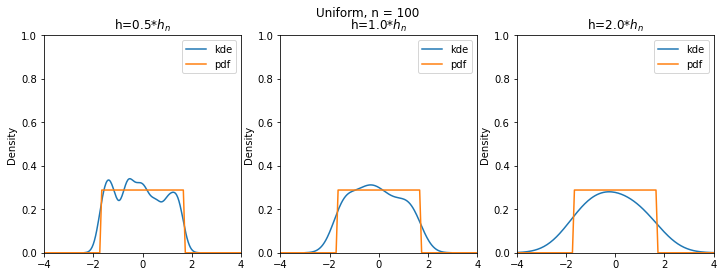

In [14]:
for name, dist in dists.items():
    for n in [20, 60, 100]:
        if name != 'Poisson':
            build_kde(name, dist['gen_data'](n), dist['pdf'], np.linspace(-4, 4, 100))
        else:
            build_kde(name, dist['gen_data'](n), dist['pdf'], np.linspace(6, 14, 100))